In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
df = pd.read_csv(r"student_data.csv")

In [4]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


school - student’s school (binary: ‘GP’ - Gabriel Pereira or ‘MS’ - Mousinho da Silveira)

sex - student’s sex (binary: ‘F’ - female or ‘M’ - male)

age - student’s age (numeric: from 15 to 22)

address - student’s home address type (binary: ‘U’ - urban or ‘R’ - rural)

famsize - family size (binary: ‘LE3’ - less or equal to 3 or ‘GT3’ - greater than 3)

Pstatus - parent’s cohabitation status (binary: ‘T’ - living together or ‘A’ - apart)

Medu - mother’s education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)

Fedu - father’s education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)

Mjob - mother’s job (nominal: ‘teacher’, ‘health’ care related, civil ‘services’ (e.g. administrative or police), ‘at_home’ or ‘other’)

Fjob - father’s job (nominal: ‘teacher’, ‘health’ care related, civil ‘services’ (e.g. administrative or police), ‘at_home’ or ‘other’)

reason - reason to choose this school (nominal: close to ‘home’, school ‘reputation’, ‘course’ preference or ‘other’)

guardian - student’s guardian (nominal: ‘mother’, ‘father’ or ‘other’)

traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

failures - number of past class failures (numeric: n if 1<=n<3, else 4)

schoolsup - extra educational support (binary: yes or no)

famsup - family educational support (binary: yes or no)

paid - extra paid classes within the course subject (Portuguese) (binary: yes or no)

activities - extra-curricular activities (binary: yes or no)

nursery - attended nursery school (binary: yes or no)

higher - wants to take higher education (binary: yes or no)

internet - Internet access at home (binary: yes or no)

romantic - with a romantic relationship (binary: yes or no)

famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

freetime - free time after school (numeric: from 1 - very low to 5 - very high)

goout - going out with friends (numeric: from 1 - very low to 5 - very high)

Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

health - current health status (numeric: from 1 - very bad to 5 - very good)

absences - number of school absences (numeric: from 0 to 93)

G1 - first period grade (numeric: from 0 to 20)

G2 - second period grade (numeric: from 0 to 20)

G3 - final grade (numeric: from 0 to 20, output target)

In [5]:
df.isnull().sum()


school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [17]:
print(df['internet'].value_counts(),
"\n", df['sex'].value_counts(),"\n",
df['address'].value_counts())

internet
yes    329
no      66
Name: count, dtype: int64 
 sex
F    208
M    187
Name: count, dtype: int64 
 address
U    307
R     88
Name: count, dtype: int64


In [18]:
cols_string = df.columns

In [19]:
col_counts = dict(df.count(axis=0))
col_types = {c: d for c, d in dict(df.dtypes).items()   if col_counts[c] > 10 }
_is_num = lambda x: x in (np.int64, float)
# separate them
cols_numerical = sorted([col for col, dtp in col_types.items() if _is_num(dtp)])
cols_string = sorted([col for col, dtp in col_types.items() if not _is_num(dtp)])
print(f"NUMERICAL: {cols_numerical}")
print(f"CATEGORICAL: {cols_string}")

NUMERICAL: ['Dalc', 'Fedu', 'G1', 'G2', 'G3', 'Medu', 'Walc', 'absences', 'age', 'failures', 'famrel', 'freetime', 'goout', 'health', 'studytime', 'traveltime']
CATEGORICAL: ['Fjob', 'Mjob', 'Pstatus', 'activities', 'address', 'famsize', 'famsup', 'guardian', 'higher', 'internet', 'nursery', 'paid', 'reason', 'romantic', 'school', 'schoolsup', 'sex']


In [20]:
# Aesthetic configuration for seaborn and matplotlib
plt.rcParams["font.family"] = "monospace"
sns.set_theme(style='darkgrid', palette='rocket')

nb_pies=15 | nb_rows=15


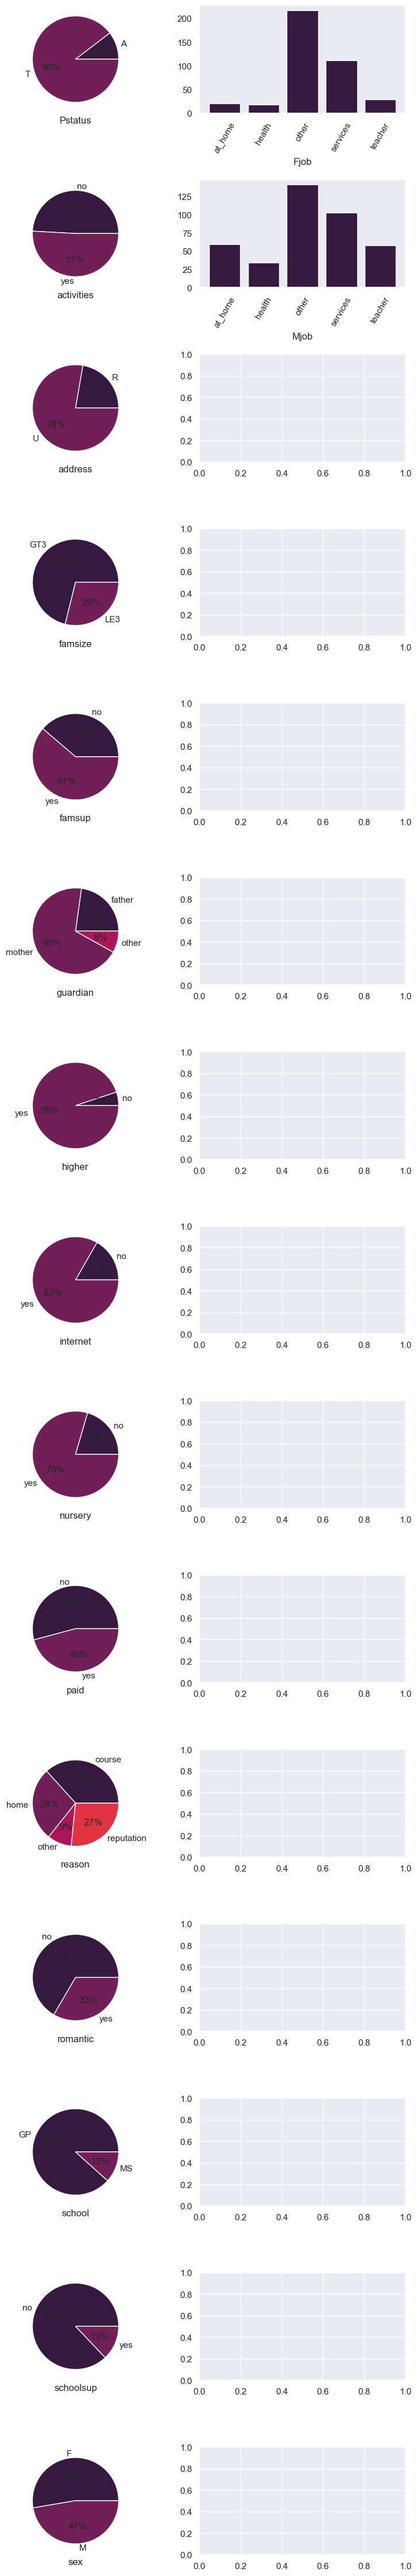

In [21]:
nb_pies = sum([len(df[c].dropna().unique()) < 5 for c in cols_string]) # is the maximum of the number of columns with less than 5 unique values 
nb_rows = max([nb_pies, len(cols_string) - nb_pies])
print(f"{nb_pies=} | {nb_rows=}")

fig, axarr = plt.subplots(ncols=2, nrows=nb_rows, figsize=(8, 3 * nb_rows))
i_0, i_1 = 0, 0
for col in cols_string:
    vals = df[col].values
    vals = vals[~pd.isnull(vals)] # filtered to remove any missing values.
    unique_values, counts = np.unique(vals, return_counts=True) # contain the unique values and counts of the column, respectively.
    
    if len(unique_values) < 5:
        axarr[i_0, 0].pie(counts, labels=unique_values, autopct='%.0f%%')
        axarr[i_0, 0].set_xlabel(col)
        i_0 += 1
        
    else:
        axarr[i_1, 1].bar(unique_values, counts)
        axarr[i_1, 1].set_xlabel(col)
        axarr[i_1, 1].grid()
        axarr[i_1, 1].tick_params(axis='x', labelrotation=60)
        #plt.xticks(rotation=45, ha='center')
        i_1 += 1
fig.tight_layout()

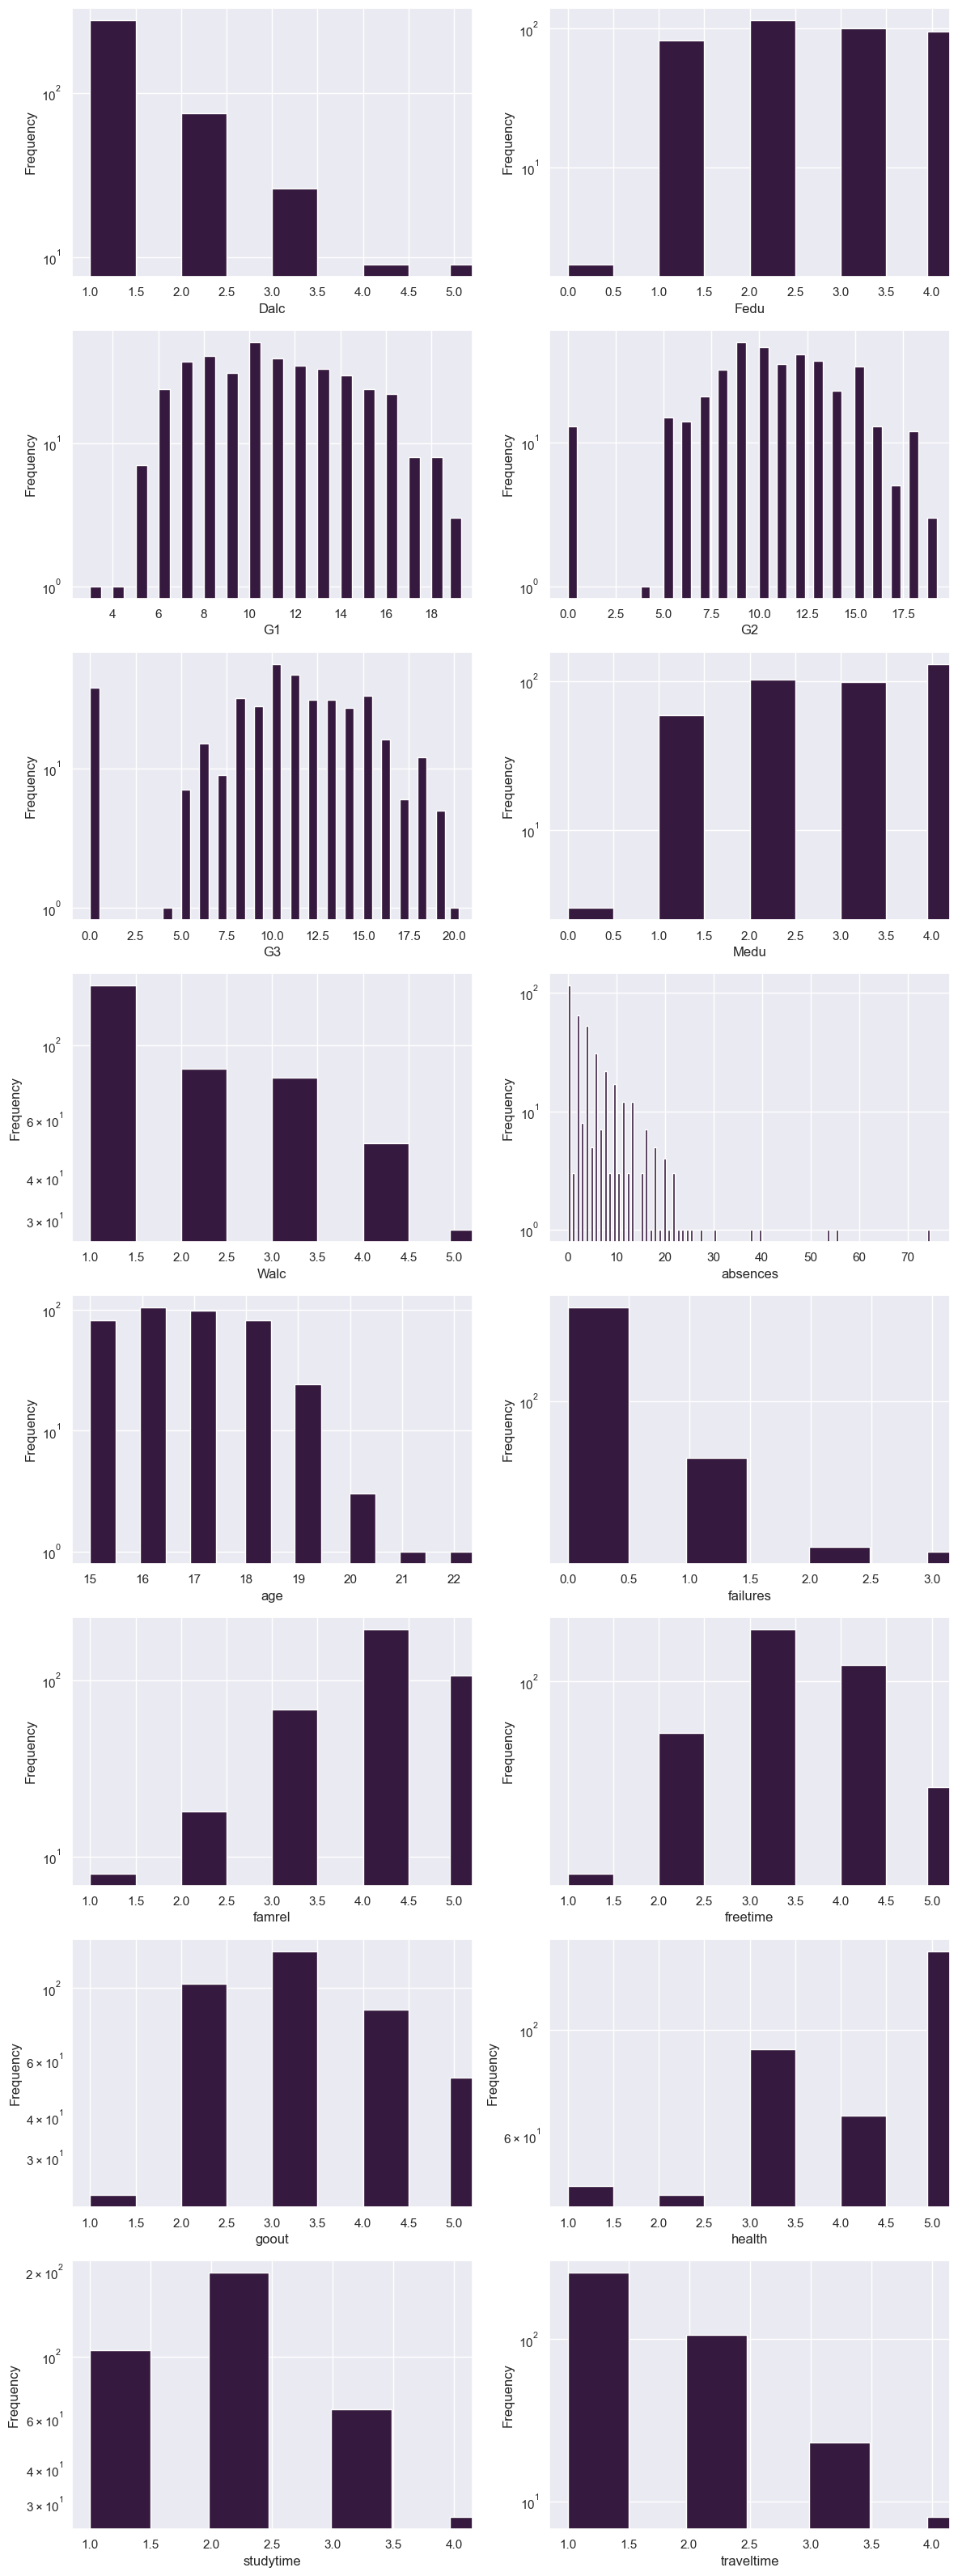

In [22]:
import math

num_of_rows = math.ceil(len(cols_numerical) / 2)
fig, axarr = plt.subplots(ncols=2, nrows=num_of_rows, figsize=(12, 4 * num_of_rows))
for i, col in enumerate(cols_numerical):
    ax = axarr[i // 2, i % 2] # represents one subplot in the grid.
    #  i // 2 and i % 2 expressions are used to calculate the row and column index of the subplot for the current column.
    df[col].plot.hist(ax=ax, bins=80, logy=True, xlabel=col, grid=True , width = 0.5)
fig.tight_layout() # to ensure that all of the subplots are properly spaced.

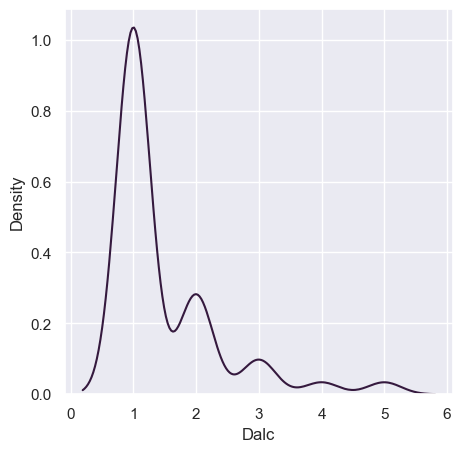

Dalc 
 Dalc
1    276
2     75
3     26
5      9
4      9
Name: count, dtype: int64


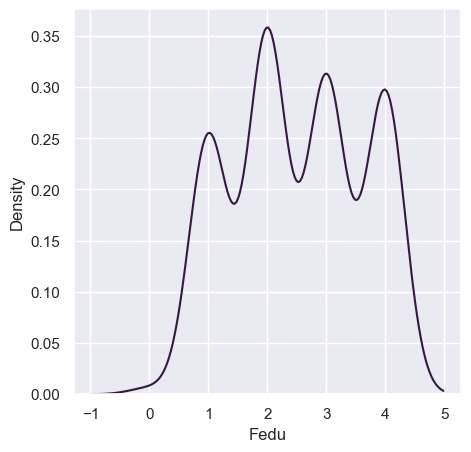

Fedu 
 Fedu
2    115
3    100
4     96
1     82
0      2
Name: count, dtype: int64


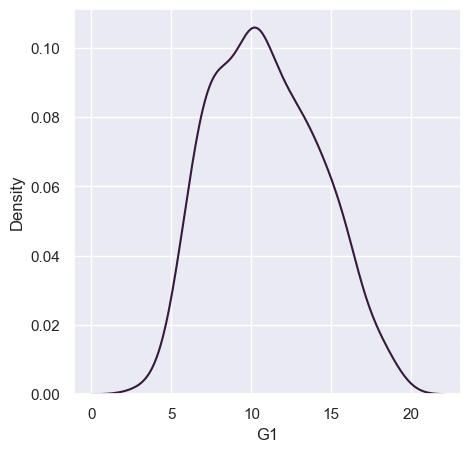

G1 
 G1
10    51
8     41
11    39
7     37
12    35
13    33
9     31
14    30
15    24
6     24
16    22
18     8
17     8
5      7
19     3
4      1
3      1
Name: count, dtype: int64


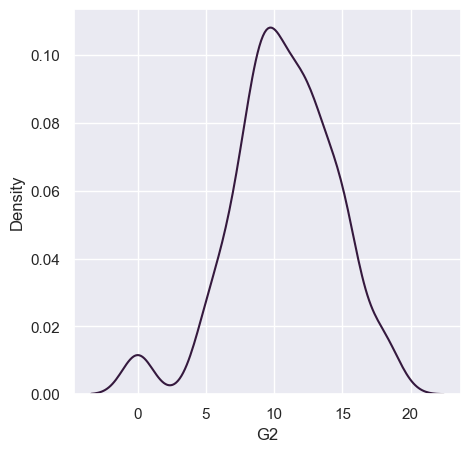

G2 
 G2
9     50
10    46
12    41
13    37
11    35
15    34
8     32
14    23
7     21
5     15
6     14
16    13
0     13
18    12
17     5
19     3
4      1
Name: count, dtype: int64


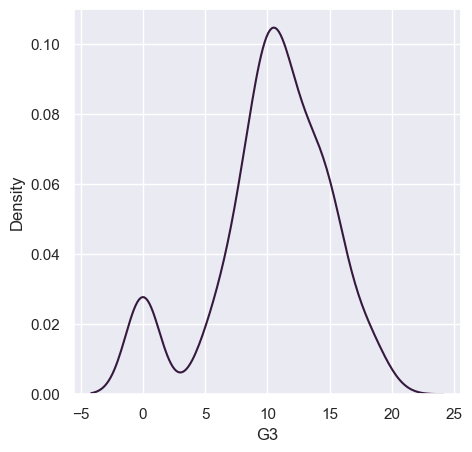

G3 
 G3
10    56
11    47
0     38
15    33
8     32
13    31
12    31
9     28
14    27
16    16
6     15
18    12
7      9
5      7
17     6
19     5
20     1
4      1
Name: count, dtype: int64


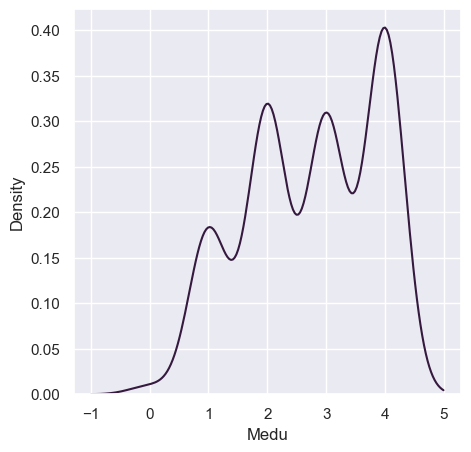

Medu 
 Medu
4    131
2    103
3     99
1     59
0      3
Name: count, dtype: int64


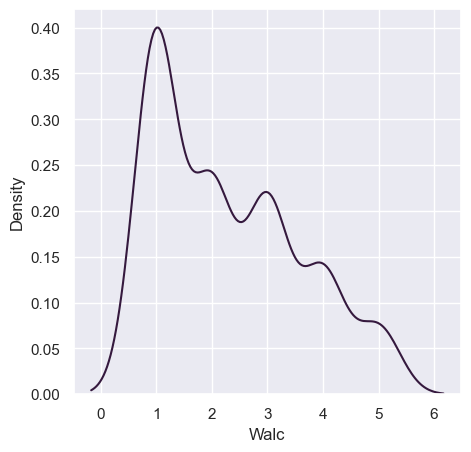

Walc 
 Walc
1    151
2     85
3     80
4     51
5     28
Name: count, dtype: int64


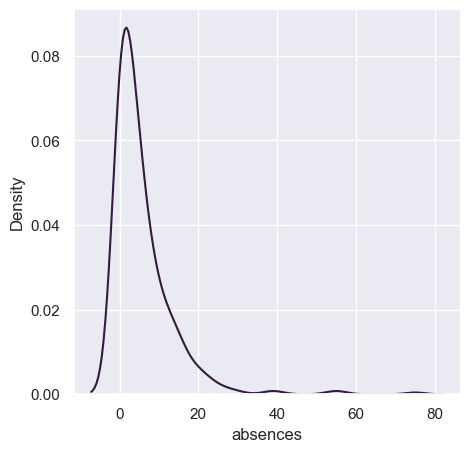

absences 
 absences
0     115
2      65
4      53
6      31
8      22
10     17
14     12
12     12
3       8
16      7
7       7
5       5
18      5
20      4
11      3
9       3
13      3
15      3
22      3
1       3
38      1
30      1
40      1
23      1
19      1
28      1
75      1
21      1
24      1
56      1
26      1
54      1
25      1
17      1
Name: count, dtype: int64


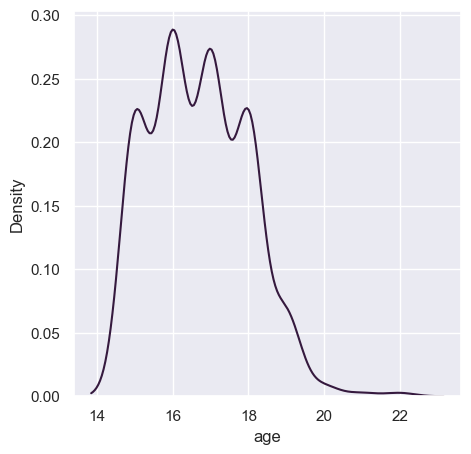

age 
 age
16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: count, dtype: int64


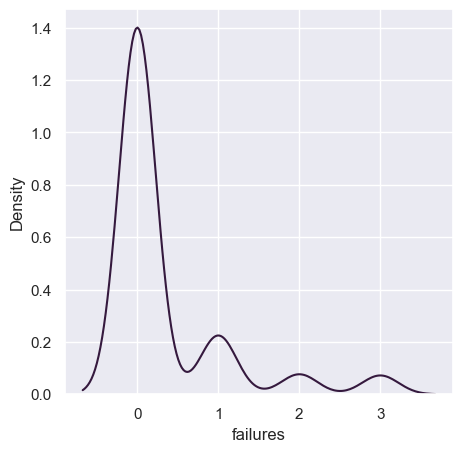

failures 
 failures
0    312
1     50
2     17
3     16
Name: count, dtype: int64


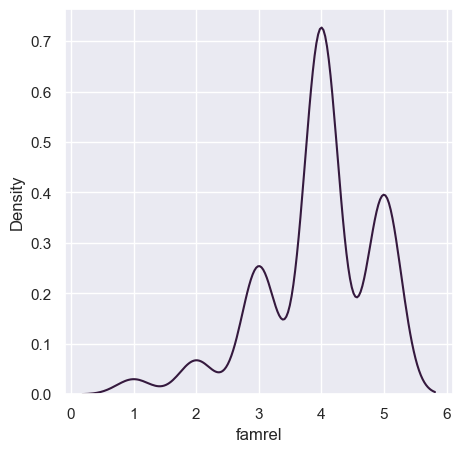

famrel 
 famrel
4    195
5    106
3     68
2     18
1      8
Name: count, dtype: int64


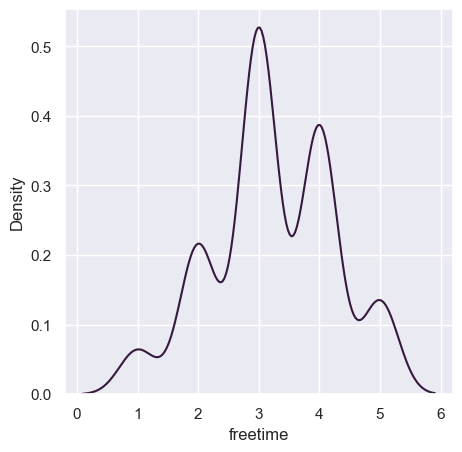

freetime 
 freetime
3    157
4    115
2     64
5     40
1     19
Name: count, dtype: int64


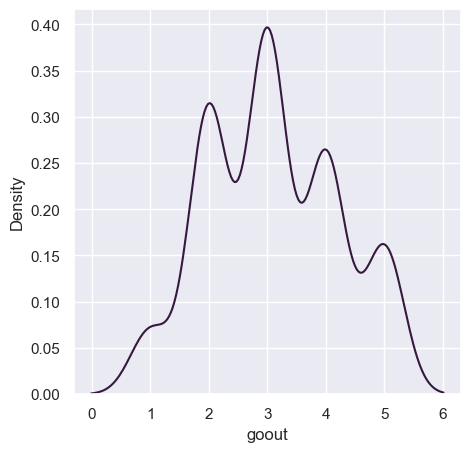

goout 
 goout
3    130
2    103
4     86
5     53
1     23
Name: count, dtype: int64


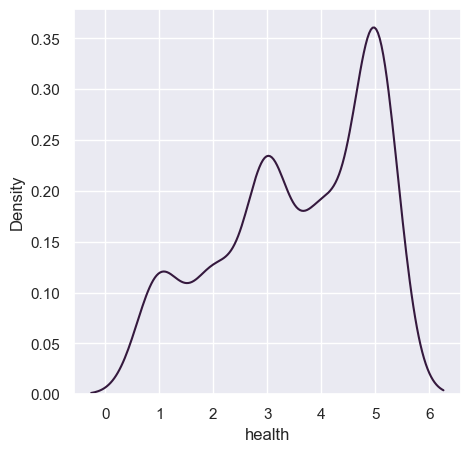

health 
 health
5    146
3     91
4     66
1     47
2     45
Name: count, dtype: int64


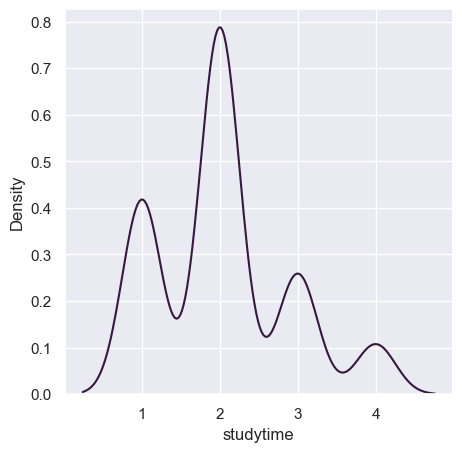

studytime 
 studytime
2    198
1    105
3     65
4     27
Name: count, dtype: int64


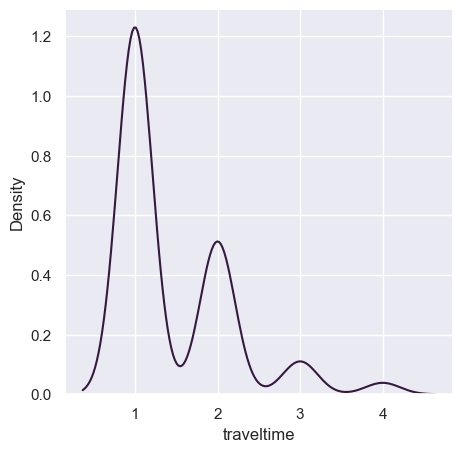

traveltime 
 traveltime
1    257
2    107
3     23
4      8
Name: count, dtype: int64


In [23]:
def hist_plot(col_2):
        plt.figure(figsize=(5,5))
        sns.kdeplot(data=df, x=col_2)

        plt.show()
        print(col_2,"\n",df[col_2].value_counts())
# Print
for i in cols_numerical:
        hist_plot(i)

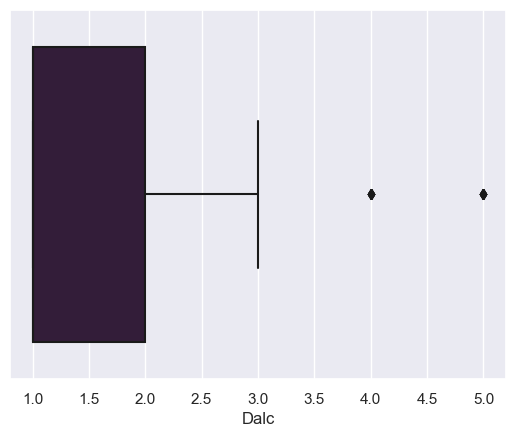

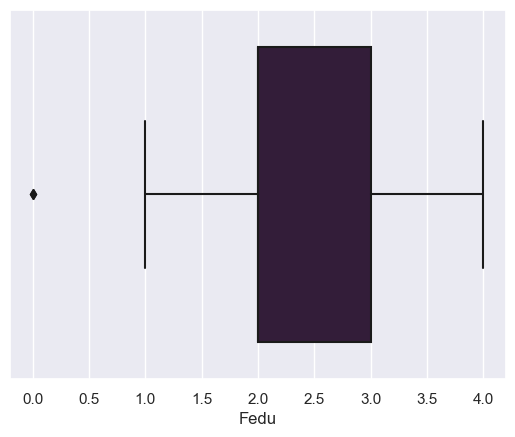

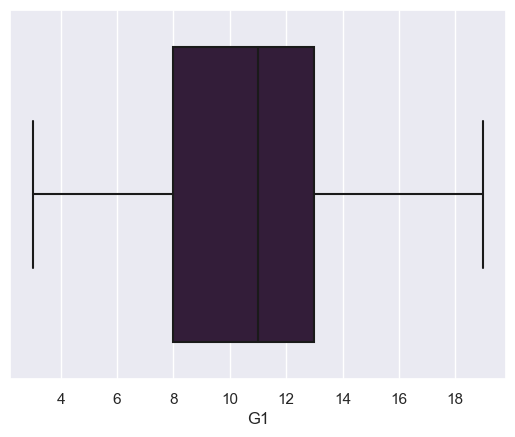

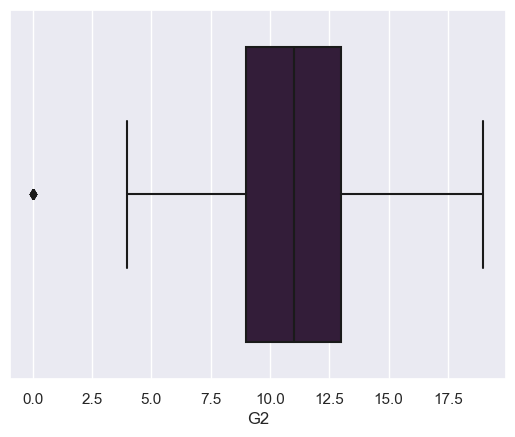

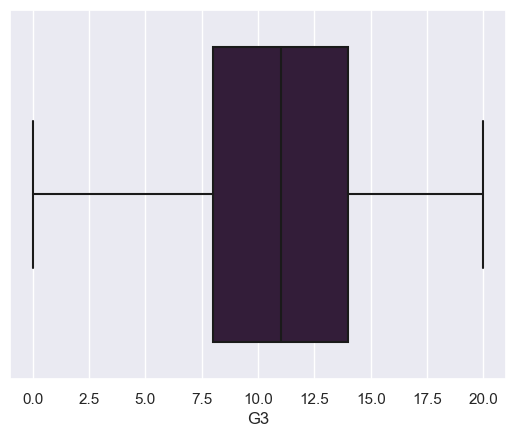

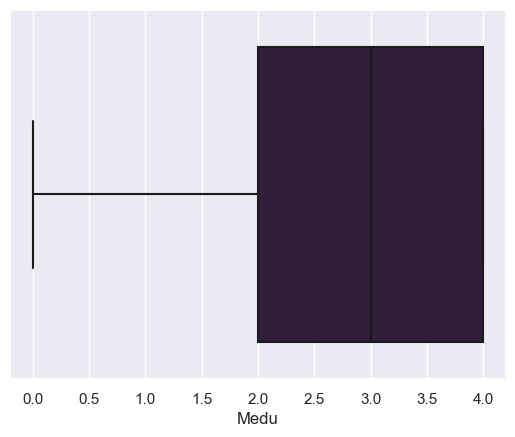

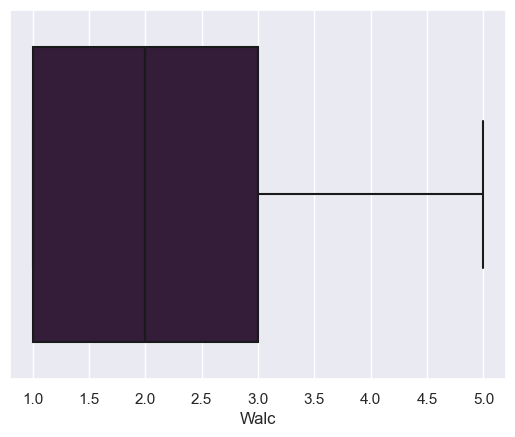

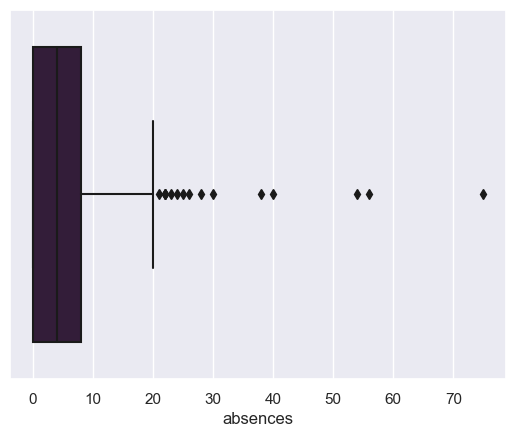

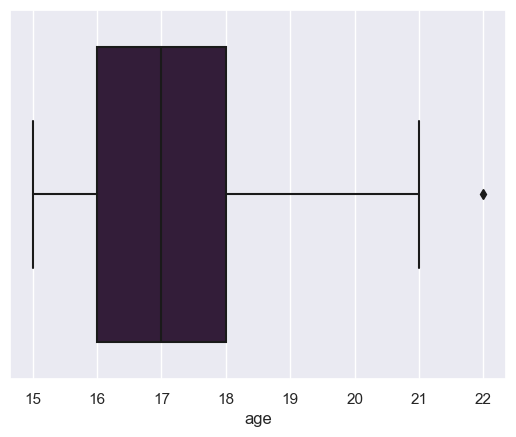

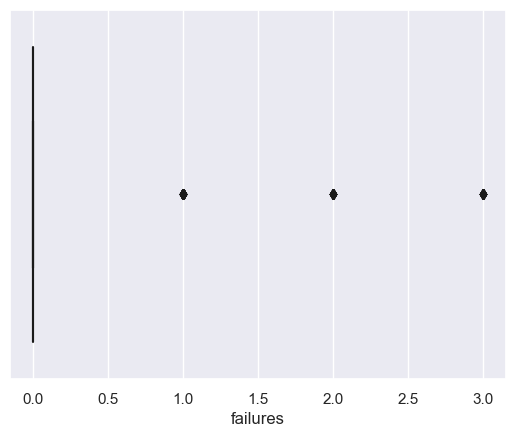

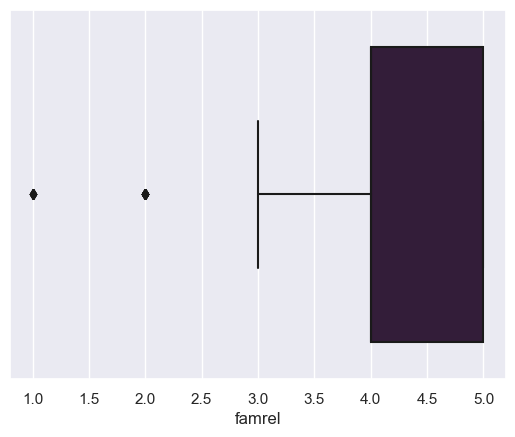

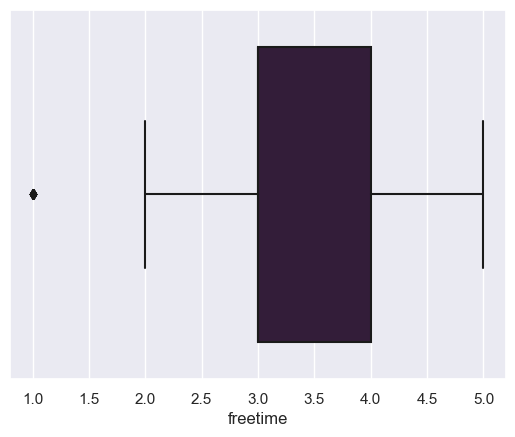

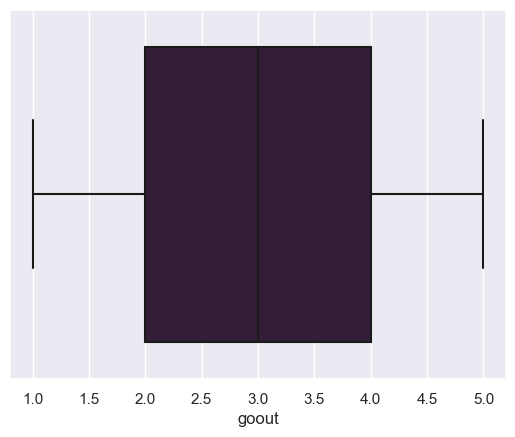

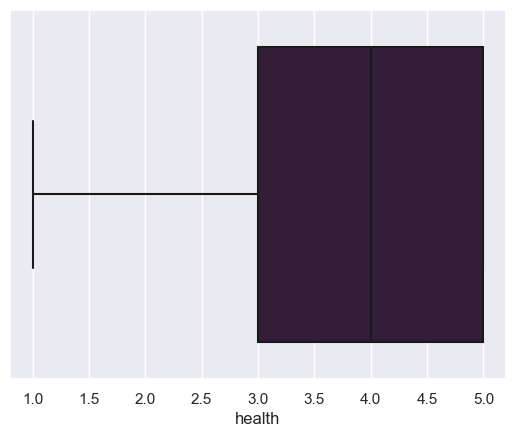

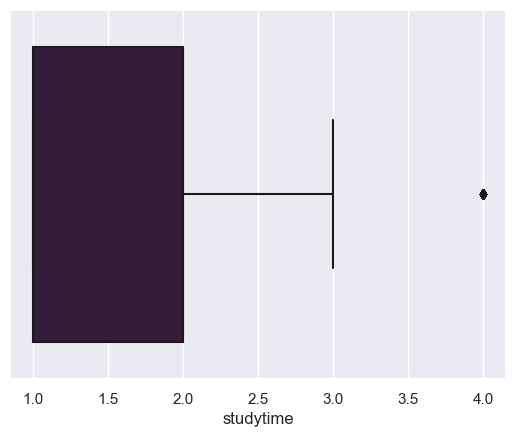

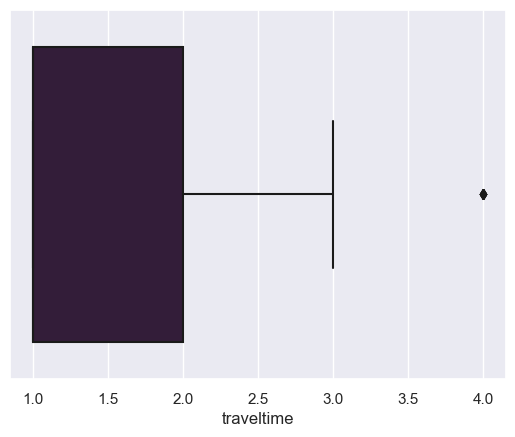

In [24]:
for i in cols_numerical:
    ax=sns.boxplot(x=df[i])
    plt.show()

<Axes: xlabel='G1', ylabel='G2'>

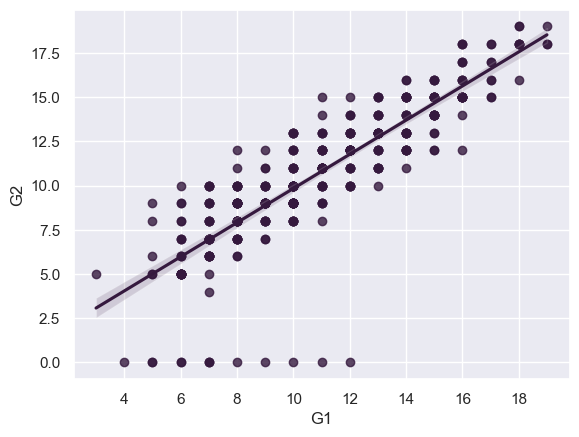

In [25]:
sns.regplot(x="G1", y="G2", data=df)

<Axes: xlabel='G2', ylabel='G3'>

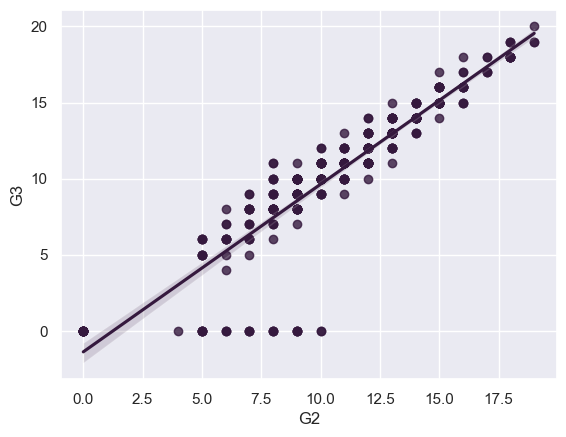

In [26]:
sns.regplot(x="G2", y="G3", data=df)

<Axes: xlabel='G1', ylabel='G3'>

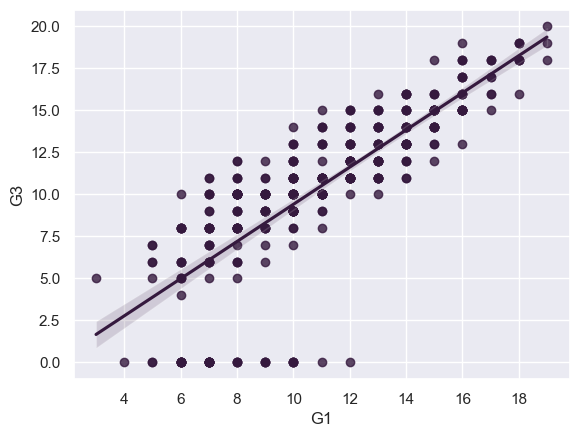

In [27]:
sns.regplot(x="G1", y="G3", data=df)


<Axes: xlabel='Dalc', ylabel='Walc'>

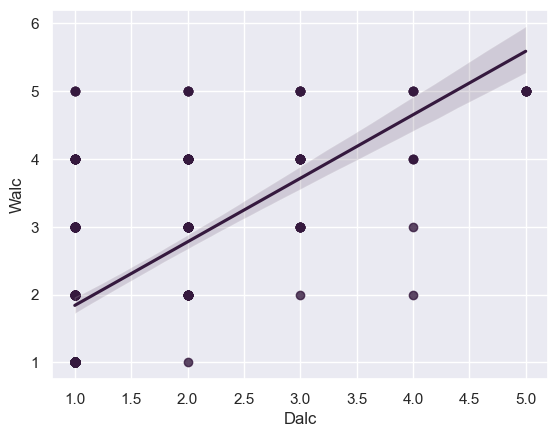

In [28]:
sns.regplot(x="Dalc",y="Walc",data=df)

In [29]:
df['Overall Health'] = (0.5 * df['Dalc'] + 0.5 * df['Walc'] + 2 * df['health'] + df['famrel']) / 4
df['Overall Health']

0      2.750
1      3.000
2      3.125
3      3.500
4      3.875
       ...  
390    4.375
391    2.375
392    3.500
393    4.375
394    4.000
Name: Overall Health, Length: 395, dtype: float64

Overall Health vs. Grade

[Text(0.5, 1.0, 'Overall Health vs. Grade')]

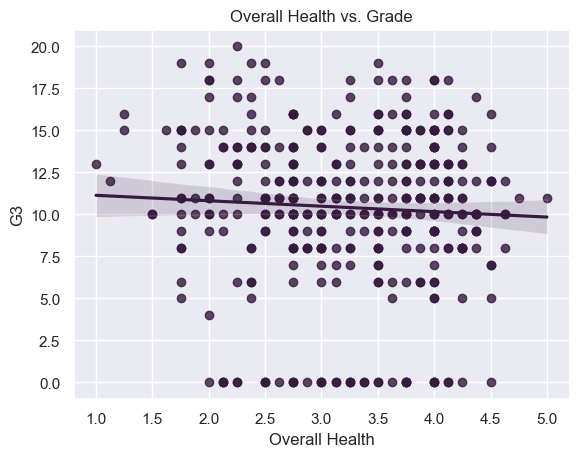

In [30]:
sns.regplot(x='Overall Health', y='G3', data=df).set(title = 'Overall Health vs. Grade')

Observations

In general better overall health value corresponds to a lower final grade. Conversely, a lower overall health value generally corresponds to a higher final grade.

The slope of the best fit line is a small distance away from zero, so the correlation between Overall Health and G3 is low.
We can explore the latter observation further by organising the plots based on the presence or absence of certain attributes

Absences vs. Grade

[Text(0.5, 1.0, 'Absences vs G3')]

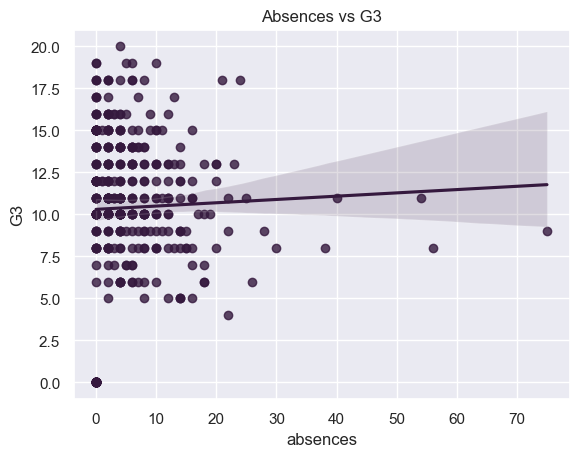

In [31]:
sns.regplot(x='absences', y='G3', data=df).set(title='Absences vs G3')

There seems to be no correlation between Absences and G3 and this is interesting we need to identify the potential cause for this phenomenon, and we need to examine more relationships on Absences to determine the cause.

[Text(0.5, 1.0, 'Absences vs G1')]

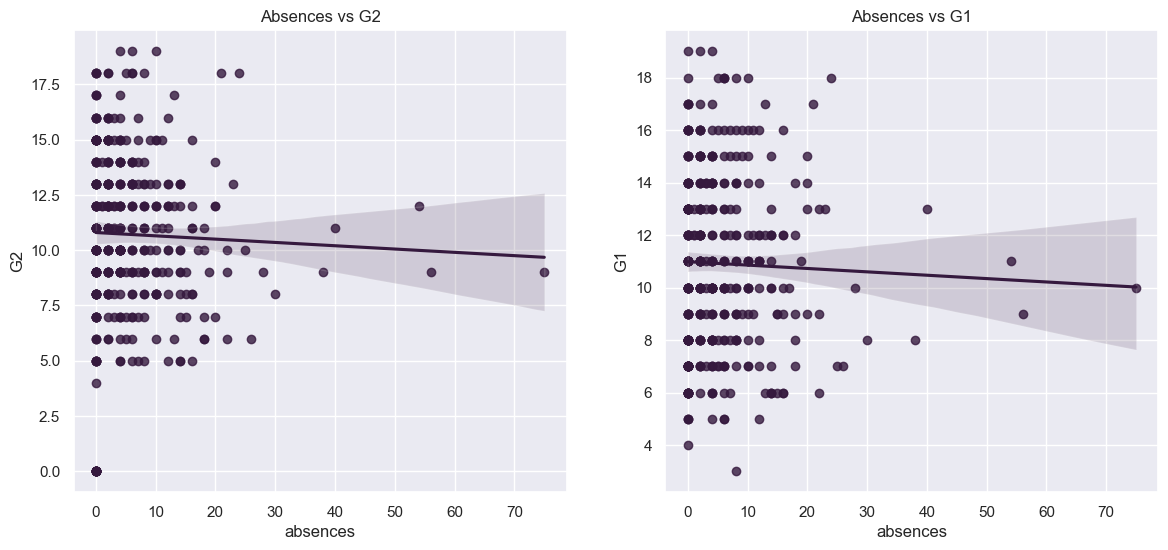

In [32]:
fig, axes = plt.subplots(1,2, figsize=(14,6))
sns.regplot(x='absences', y='G2', data=df, ax=axes[0])
axes[0].set(title='Absences vs G2')

sns.regplot(x='absences', y='G1', data=df, ax=axes[1])
axes[1].set(title='Absences vs G1')

This low correlation is because absent students (usually) revise the material missed, effectively accounting for their absence.

For a further explanation, we need to plot the correlation matrix to validate our hypothesis.

<Axes: >

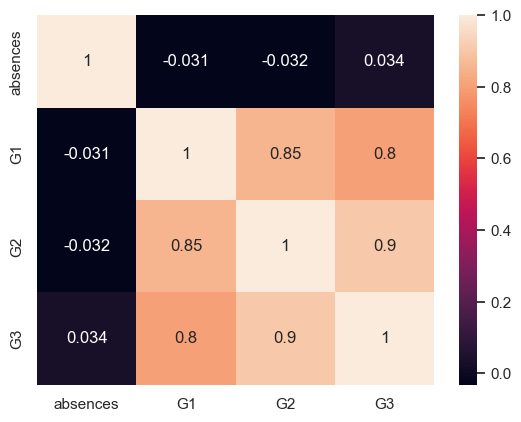

In [33]:
sns.heatmap(df[['absences', 'G1', 'G2', 'G3']].corr(), annot=True)

Conclusion

The number of absences a student has does not necessarily result in a lower grade overall, as absent students typically make up the material they missed, effectively accounting for their absence.

Age vs. Grade

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


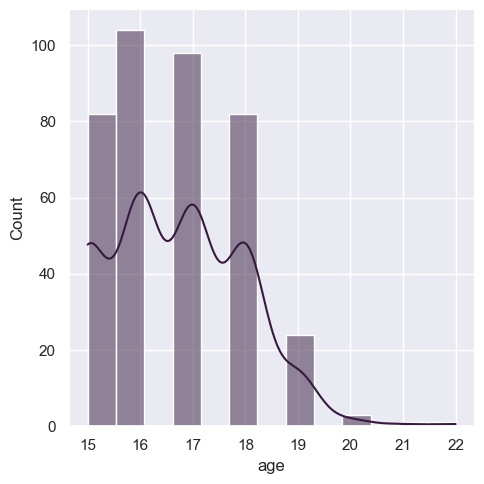

In [34]:
sns.displot(x='age', data=df, kind='hist', kde=True)

In [35]:
age_grade = df.groupby("age").aggregate({'G1': 'mean', 'G2': 'mean', 'G3': 'mean'})
age_grade.reset_index(inplace=True)
age_grade

,age,G1,G2,G3
0,15,11.231707,11.365854,11.256098
1,16,10.942308,11.182692,11.028846
2,17,10.897959,10.479592,10.275510
3,18,10.719512,10.134146,9.548780
4,19,10.250000,9.250000,8.208333
5,20,13.666667,13.666667,14.000000
6,21,10.000000,8.000000,7.000000
7,22,6.000000,8.000000,8.000000


There's an inverse relationship between age and Grads

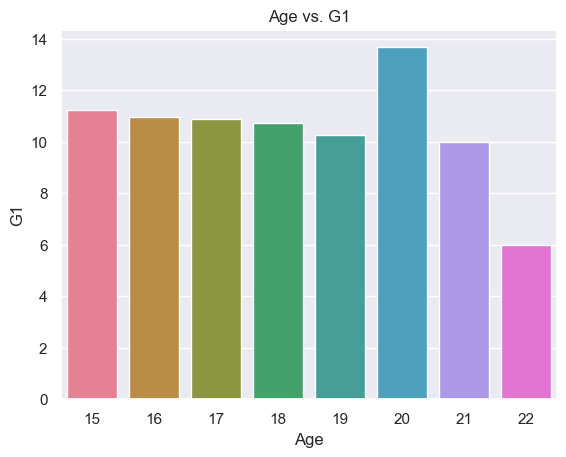

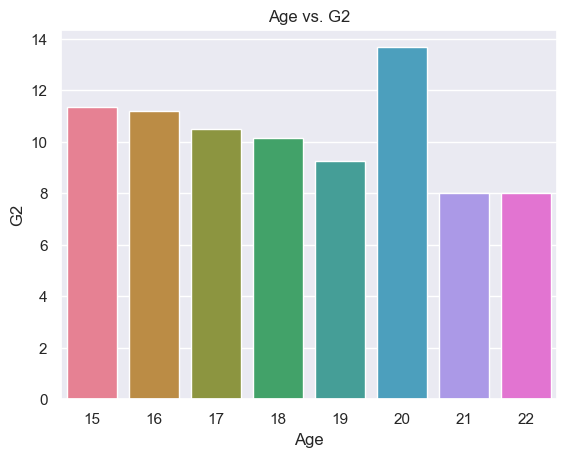

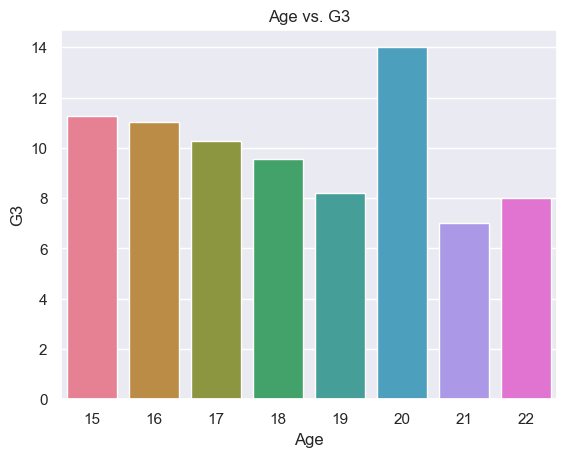

In [36]:
grades = ['G1', 'G2', 'G3']

for grade in grades:
    sns.barplot(data=age_grade, x='age', y=grade, palette='husl').set(xlabel='Age', ylabel=grade, title=f'Age vs. {grade}');
    plt.show();

Conclusion

The older a person is, the lower the grades they receive are; however, twenty-year-olds (in this dataset) exhibit an outstanding performance: they lead by at least 2 whole grade points on a 19-point scale.

At the moment, we cannot make any substantiated claims as to why such a drastic increase occurs.

Time Productivity vs. Grade

<Axes: xlabel='Time Productivity', ylabel='G3'>

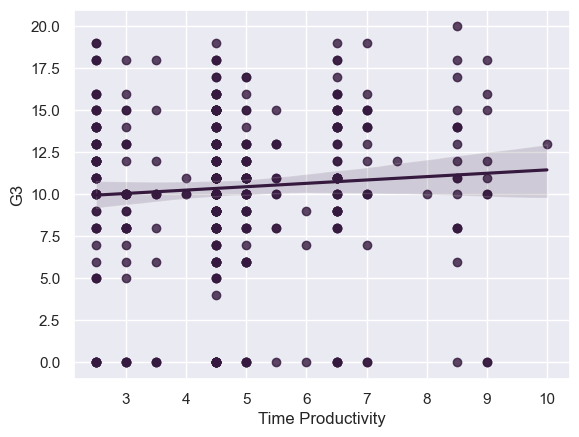

In [37]:
df['Time Productivity'] = 0.5 * df['traveltime'] + 2 * df['studytime']
sns.regplot(x='Time Productivity', y='G3', data=df)

As expected, students with a greater time productivity have better grades.

<Axes: xlabel='studytime', ylabel='G3'>

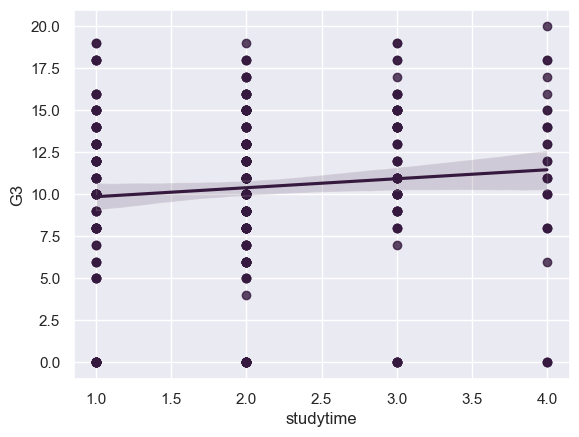

In [38]:
sns.regplot(x='studytime', y='G3', data=df)

<Axes: xlabel='traveltime', ylabel='G3'>

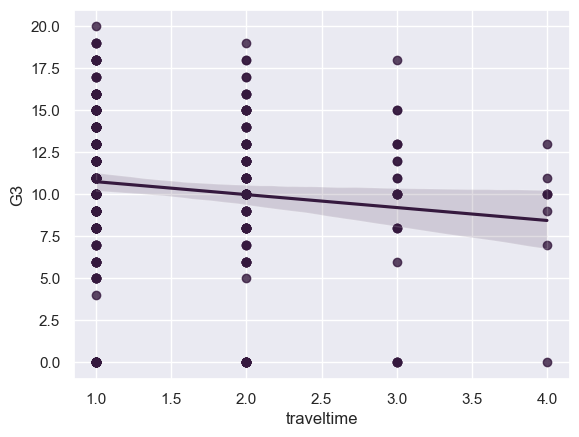

In [39]:
sns.regplot(x='traveltime', y='G3', data=df)

Another batch of expected results. Students who study more score better on tests and quizzes. In contrast, students who travel more perform worse on tests and quizzes.


Conclusion

This section confirmed the obvious: students who study more receive better grades whereas students who travel more or study less receive lower grades.

Mothers' Job and Education

In [40]:
MotherJop_Edu = df.groupby("Mjob").aggregate({"Medu": "mean"})
MotherJop_Edu.reset_index(inplace=True)
MotherJop_Edu.sort_values(by='Medu', ascending=False, inplace=True)

MotherJop_Edu

,Mjob,Medu
4,teacher,3.948276
1,health,3.647059
3,services,2.844660
2,other,2.404255
0,at_home,1.711864


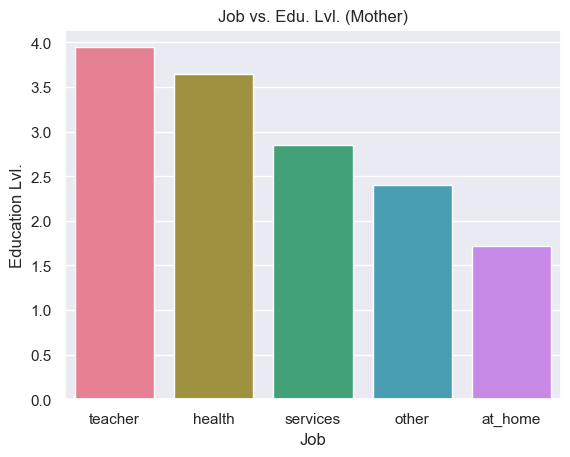

In [41]:
sns.barplot(x='Mjob', y='Medu', data=MotherJop_Edu , palette='husl').set(xlabel='Job', ylabel='Education Lvl.', title='Job vs. Edu. Lvl. (Mother)');

teachers and health care professionals need to have a high education level in order to acquire a job in the industry, and conversely with at home mother

Fathers' Job and Education

In [43]:
FatherJop_Edu = df.groupby("Fjob").aggregate({"Fedu": "mean"})
FatherJop_Edu.reset_index(inplace=True)
FatherJop_Edu.sort_values(by='Fedu', ascending=False, inplace=True)

FatherJop_Edu

,Fjob,Fedu
4,teacher,3.862069
1,health,3.333333
3,services,2.558559
0,at_home,2.350000
2,other,2.271889


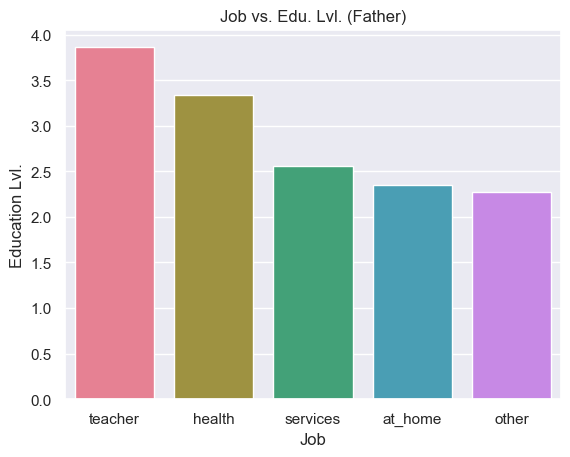

In [44]:
sns.barplot(x='Fjob', y='Fedu', data=FatherJop_Edu ,palette='husl').set(xlabel='Job', ylabel='Education Lvl.', title='Job vs. Edu. Lvl. (Father)');

The graph for the father yields about the same results as the graph for the mother. 
However, there is one interesting finding: at-home fathers have a higher education level than at-home mothers.

Conclusion

This mini-exploration yielded reasonable results. Teachers and health care professionals had a higher education level while at-home parents tended to reside at the lower end of the education level spectrum.

Job vs. Grade

In [45]:
MotherJop_Grade = df.groupby('Mjob').aggregate({'G3':'mean'}).reset_index()
MotherJop_Grade

,Mjob,G3
0,at_home,9.152542
1,health,12.147059
2,other,9.822695
3,services,11.019417
4,teacher,11.051724


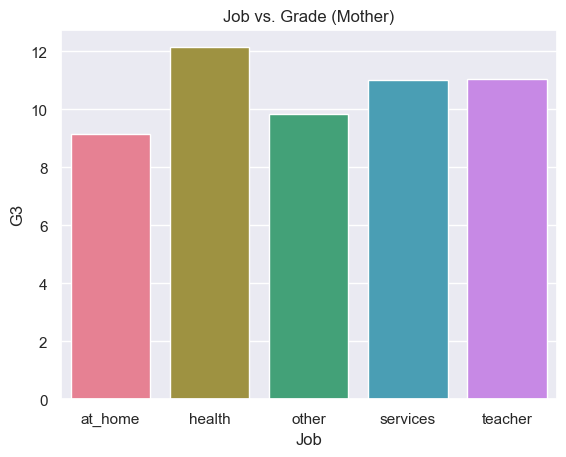

In [46]:
sns.barplot(x = 'Mjob' , y='G3' , palette='husl' , data = MotherJop_Grade).set(xlabel='Job', ylabel='G3', title='Job vs. Grade (Mother)');

students with mothers who are health care professionals receive a higher grade on average.

In [47]:
FatherJop_Grade = df.groupby('Fjob').aggregate({'G3':'mean'}).reset_index()
FatherJop_Grade

,Fjob,G3
0,at_home,10.150000
1,health,11.611111
2,other,10.193548
3,services,10.297297
4,teacher,11.965517


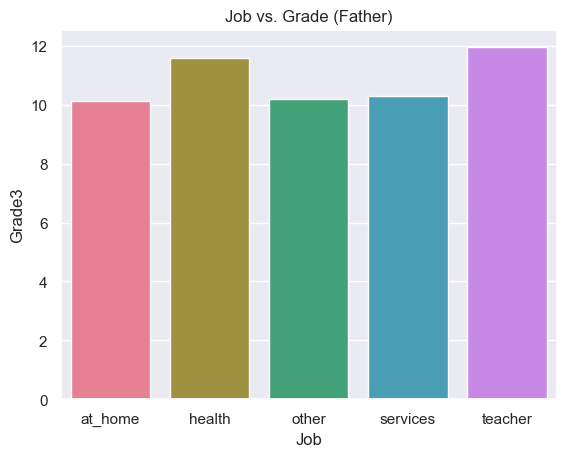

In [48]:
sns.barplot(x='Fjob', y='G3', data=FatherJop_Grade , palette='husl').set(xlabel='Job', ylabel='Grade3', title='Job vs. Grade (Father)');

These results are more reasonable than the previous set. Notice that the order of these results corresponds with the order of the father's education level.
In other words, fathers with higher education levels tend to increase their children's performance more than fathers with lower education levels.
The father directly passes down his knowledge, thus cultivating the student's knowledge.

Conclusion


This exploration uncovered the slightly surprising relationship between the Mother's Job and the student's grade. We discovered that mothers who work in the health industry have children who receive higher scores on average than mothers who work in other fields.


In contrast, for fathers, we observed a relationship one might expect. Fathers with higher educational levels directly passed on that knowledge to the student, eventually improving the student's overall test scores.

Family Size vs. Grade

In [50]:
Family_size_grade = df.groupby("famsize").aggregate({"G1": "mean", "G2": "mean", "G3": "mean"}).reset_index()
Family_size_grade

,famsize,G1,G2,G3
0,GT3,10.758007,10.519573,10.177936
1,LE3,11.280702,11.192982,11.000000


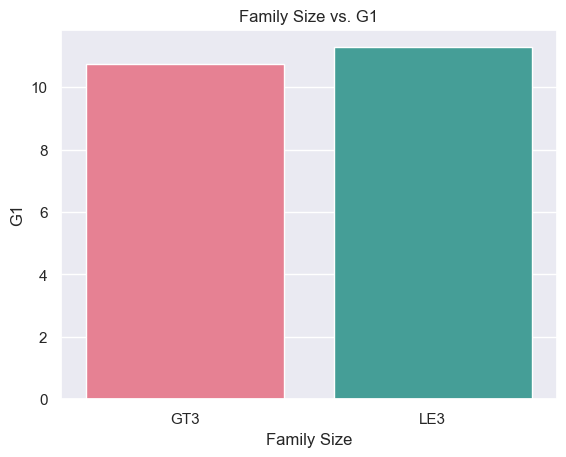

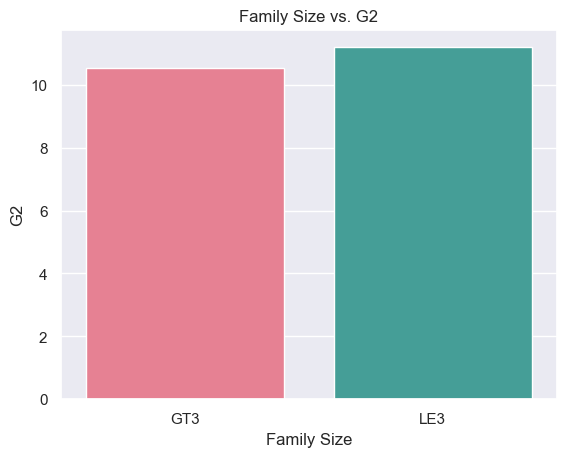

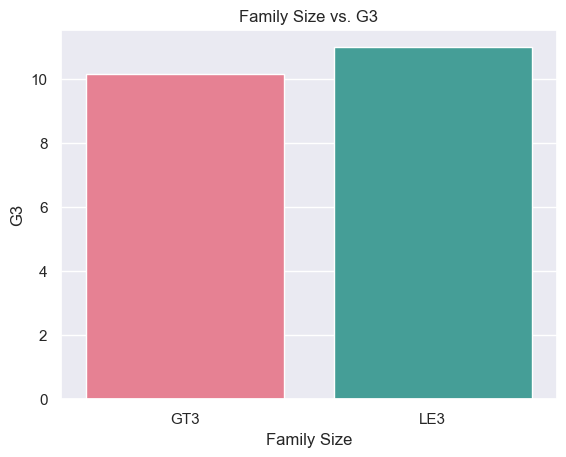

In [51]:
for grade in grades:
    sns.barplot(data=Family_size_grade, x='famsize', y=grade, palette='husl').set(xlabel='Family Size', ylabel=grade, title=f'Family Size vs. {grade}');
    plt.show();

Conclusion

As the barplots show, children with no siblings tend to score slightly - indeed, very slightly - higher than students with siblings

Activites vs. Grade

In [52]:
act_gr = df.groupby("activities").aggregate({"G1": "mean", "G2": "mean", "G3": "mean"}).reset_index()
act_gr

,activities,G1,G2,G3
0,no,10.716495,10.520619,10.340206
1,yes,11.094527,10.900498,10.487562


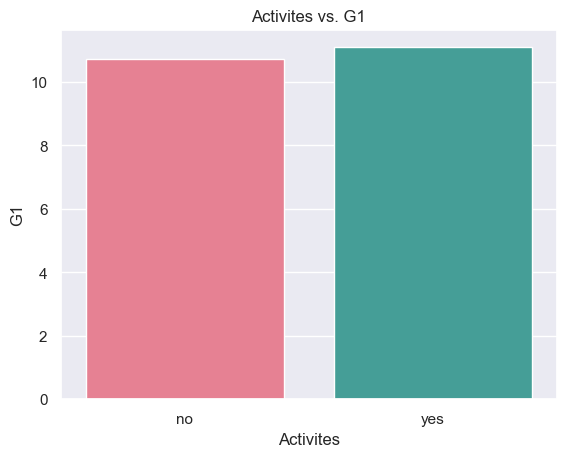

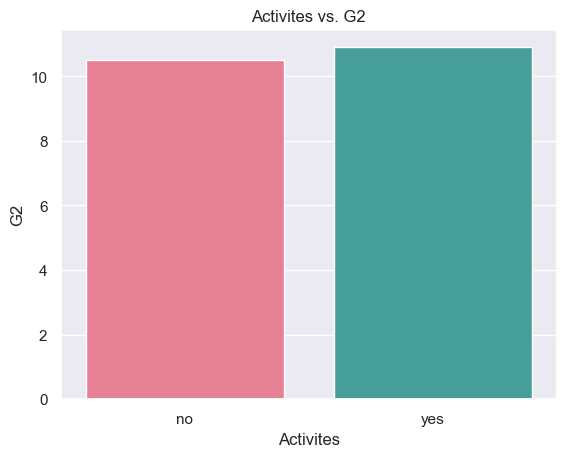

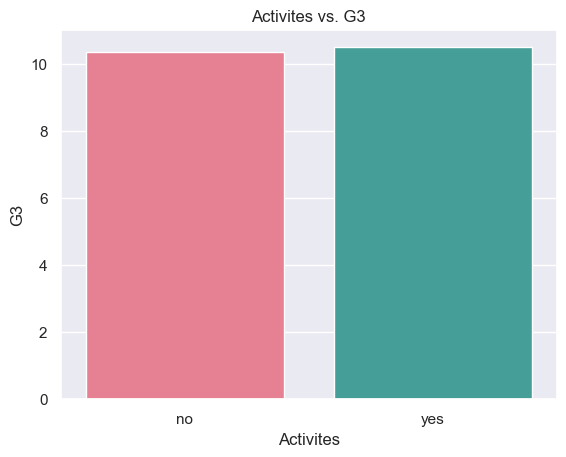

In [53]:
for grade in grades:
    sns.barplot(data=act_gr, x='activities', y=grade, palette='husl').set(xlabel='Activites', ylabel=grade, title=f'Activites vs. {grade}');
    plt.show();

People with activites receive marginally higher grades on average.

Go out vs Grades

In [54]:
out_gr = df.groupby("goout").aggregate({"G1": "mean", "G2": "mean", "G3": "mean"}).reset_index()
out_gr

,goout,G1,G2,G3
0,1,11.130435,10.782609,9.869565
1,2,11.368932,11.456311,11.194175
2,3,11.276923,11.053846,10.961538
3,4,10.430233,10.058140,9.651163
4,5,9.792453,9.471698,9.037736


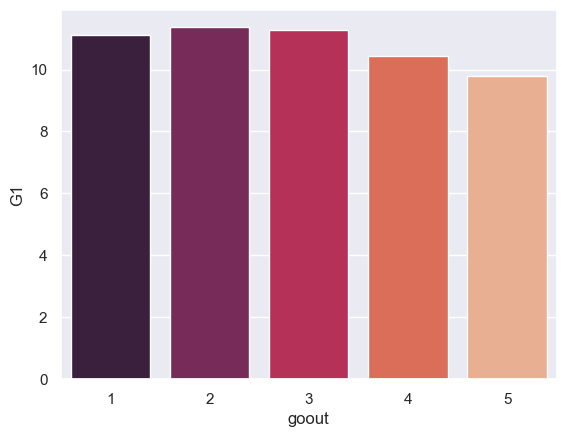

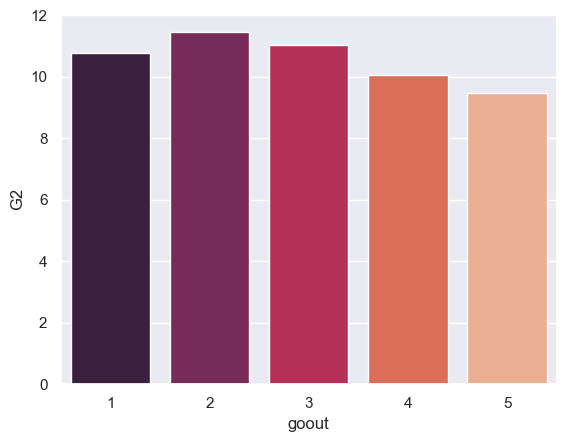

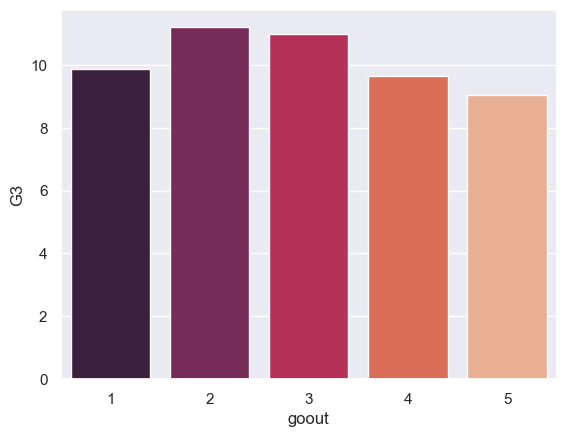

In [55]:
for grade in grades:
    sns.barplot(data=out_gr, x='goout', y=grade, palette='rocket')
    plt.show()

Overall, going out more results in an short-lived increase followed by a steep decrease in test scores.

Conclusion

This section portrayed a surprising relationship between how often a student engages in social activity. Students with social activity, in general, scored better than students without socialization.


On the contrary, students who went out more often tended to score on the lower side of the grade spectrum; the perfect rating in goout was 2, as it resulted in the highest average score for all scoring metrics.